In [ ]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import numpy as np #importing numpy as np to use its functions
import pandas as pd #importing pandas to manipulate DataFrame
from sklearn.preprocessing import StandardScaler #importing standard scaler function to standardize data
import tensorflow as tf #importing tensorflow
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score #importing metrics from sklearn to compare models
from tensorflow.keras.utils import plot_model
from ann_visualizer.visualize import ann_viz
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from IPython.lib.display import IFrame
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Problème I : Problème de classification par un ou plusieurs « Simple Linear Perceptron »



# Problème II : Réseau de neurones « From Scratch »


## Creation du dataset, import des données

In [ ]:
X1,X2,X3,X4,Y=[1.0,0.0,1.0,0.0,0.0],[1.0,1.0,1.0,0.0,0.0],[1.0,0.0,1.0,0.0,0.0],[0.0,0.0,1.0,1.0,0.0],[1.0,0.0,1.0,0.0,0.0] 
d = {'X1': X1, 'X2': X2,'X3': X3,'X4': X4,'Y': Y}

In [ ]:
df=pd.DataFrame(data=d)
df

,X1,X2,X3,X4,Y
0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [ ]:
X=df.drop(columns='Y')
Y=df['Y']
Y=Y.to_numpy()
X=X.to_numpy()
Y=Y.reshape((Y.shape[0], 1))

In [ ]:
print('dimensions de X:', X.shape)
print('dimensions de y:', Y.shape)

fig = px.scatter_3d(df, x='X1', y='X2', z='X3',color='Y')
fig.show()

dimensions de X: (5, 4)
dimensions de y: (5, 1)


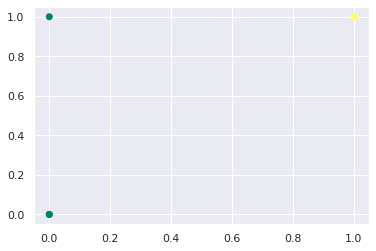

In [ ]:
plt.scatter(df["X1"], df["X2"], c=df['Y'], cmap='summer')
plt.show()

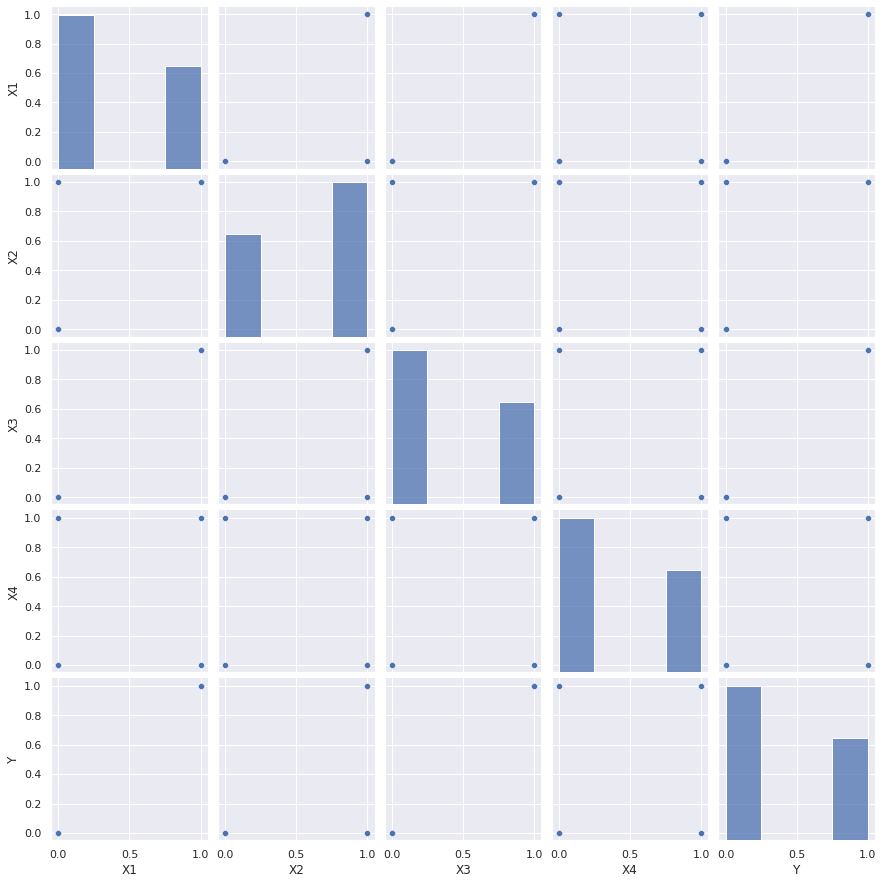

In [ ]:
sns.pairplot(df)

## Créons un neuronne

Nous allons maintenant créer les différentes fonctions pour le neuronne:

In [ ]:
np.random.seed(42) #defining the seed in order to get same results each time we run the code

def initialize(X): #initializing the neurons with random values in order to create uncertainty
    Weight = np.random.randn(X.shape[1], 1) #defining the first weight
    noise = np.random.randn(1) #defining the noise for the beginning
    return (Weight, noise)

def model(X, Weight, noise): #computing the neuron's outputs
    Neuron_output = X.dot(Weight) + noise #computing the product between X and the neurons weights
    Activation = 1/(1 + np.exp(-Neuron_output)) #computing the activation function value on the neuron output
    return Activation

def Binary_Cross_Entropy(Activation, Y): #defining the function
    return 1 / len(Y) * np.sum(-Y * np.log(Activation) - (1 - Y) * np.log(1 - Activation)) #computing the value of the function

def gradients(A, X, y): #creating gradient descent
    dW = 1 / len(y) * np.dot(X.T, A - y) #differenciating the weight
    db = 1 / len(y) * np.sum(A - y) #differenciating the noise
    return (dW, db) #returning them

def update(dW, db, W, b, learning_rate): #updating the neurons weights
    W = W - learning_rate * dW #computing the new weights
    b = b - learning_rate * db #computing the new noises 
    return (W, b)

def predict(X, Weight,noise): #making the predictions of the model
    Activation = model(X, Weight,noise)
    return Activation >= 0.5    

In [ ]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
  # initialisation W, b
  W, b = initialize(X)
  Loss = []
  for i in range(n_iter):
    A = model(X, W, b)
    Loss.append(Binary_Cross_Entropy(A, y))
    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate)
  y_pred = predict(X, W, b)
  print(y_pred)
  print(accuracy_score(y, y_pred))
  plt.plot(Loss)
  plt.show()
  return (W, b)

[[ True]
 [False]
 [ True]
 [False]
 [False]]
1.0


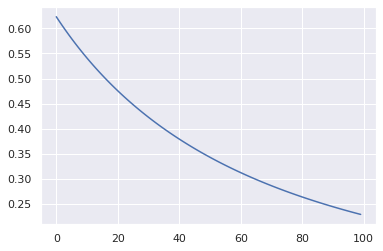

In [ ]:
W, b = artificial_neuron(X, Y)

## Creation du réseau de neuronnes :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [ ]:
def initializelayers(nlayer0, nlayer1, nlayer2): 
    Weight1 = np.random.randn(nlayer1, nlayer0) #generating a random weight for the neurones of the first layer
    noise1 = np.zeros((nlayer1, 1)) #generating a random noise for the first layer
    Weight2 = np.random.randn(nlayer2, nlayer1) #generating a random weight for the neurones of the first layer
    noise2 = np.zeros((nlayer2, 1)) #generating a random noise for the second layer
    parameters = { #storing the parameters in a dictionary
                  'Weight1': Weight1,
                  'noise1': noise1,
                  'Weight2': Weight2,
                  'noise2': noise2
    }
    return parameters

In [ ]:
def forward_propagation(X, parameters):

    Weight1 = parameters['Weight1'] #setting the first layer Weights
    noise1 = parameters['noise1'] #setting the first layer noise
    Weight2 = parameters['Weight2'] #setting the second layer weight
    noise2 = parameters['noise2'] #setting the second layer noise

    Z1 = Weight1.dot(X) + noise1 #computing the result of this layers neuron's weight + noise
    A1 = 1 / (1 + np.exp(-Z1)) #computing the activation result of the first layer

    Z2 = Weight2.dot(A1) + noise2 #computing the result of this second layer neuron's weight + noise
    A2 = 1 / (1 + np.exp(-Z2)) #computing the activation result of the second and last layer

    activations = { 
        'A1': A1,
        'A2': A2
    } #creating the dict containing all the activations

    return activations

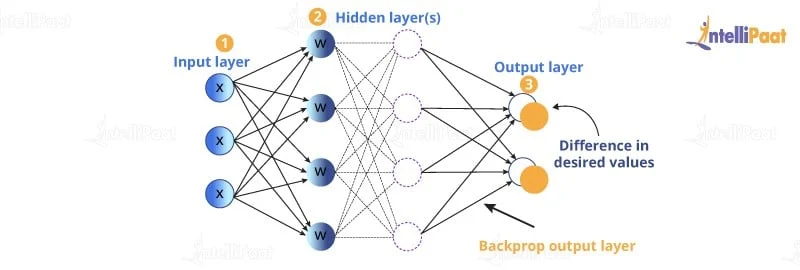)

In [ ]:
def back_propagation(X, y, parameters, activations):

    A1 = activations['A1'] #storing the first layer activation values in a variable
    A2 = activations['A2'] #storing the second layer activation values in a variable
    Weight2 = parameters['Weight2'] #storing the second layer weight in a variable

    m = y.shape[1] #getting the shape of the output

    dZ2 = A2 - y #computing the variations between activation of the second layer and target
    dWeight2 = 1 / m * dZ2.dot(A1.T) #computing the back propagation
    dnoise2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True) #computing the new noise

    #computing the small variation between the activation from the first layer and the activation for the second layer after being corrected 
    dZ1 = np.dot(Weight2.T, dZ2) * A1 * (1 - A1)
    #computing the small variation of the weight of the second layer
    dWeight1 = 1 / m * dZ1.dot(X.T)
    #computing the variation for the noise
    dnoise1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = { #storing the computed gradients in a dictionnary
        'dWeight1' : dWeight1,
        'dnoise1' : dnoise1,
        'dWeight2' : dWeight2,
        'dnoise2' : dnoise2
    }
    
    return gradients

In [ ]:
def update(gradients, parameters, learning_rate): 

    Weight1,noise1 = parameters['Weight1'],parameters['noise1'] #getting the weight and noise parameters of the first layer
    Weight2,noise2 = parameters['Weight2'],parameters['noise2'] #getting the weight and noise parameters of the second layer

    dWeight1,dnoise1 = gradients['dWeight1'],gradients['dnoise1'] #getting the previously computed gradients of weight and noise for the first layer
    dWeight2,dnoise2 = gradients['dWeight2'],gradients['dnoise2'] #getting the previously computed gradients of weight and noise for the second layer

    Weight1,noise1= Weight1 - learning_rate * dWeight1,noise1 - learning_rate * dnoise1 #computing the update value of the weight and noise for the first layer
    Weight2,noise2= Weight2 - learning_rate * dWeight2,noise2 - learning_rate * dnoise2 #computing the updated value of the weight and noise for second layer

    parameters = { #storing the updated parameters in a dictionnary
        'Weight1': Weight1,
        'noise1': noise1,
        'Weight2': Weight2,
        'noise2': noise2
    }

    return parameters

In [ ]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres) #computing the activations
  A2 = activations['A2'] #getting the activations of the last layer
  return A2 >= 0.5

In [ ]:
def neural_network(X, y, nlayer1=32, learning_rate = 0.1, n_iter = 1000):

    # initializing parameters
    nlayer0 = X.shape[0] #getting the input layer shape
    nlayer2 = y.shape[0] #getting the output layer shape
    np.random.seed(42) #setting the random seed
    parameters = initializelayers(nlayer0, nlayer1, nlayer2) #initializing the layers

    train_loss,train_acc,history  = [], [], [] #creating empty list to store metrics
    # gradient descent loop 
    for i in tqdm(range(n_iter)): #setting a progress bar

        activations = forward_propagation(X, parameters) #computing activations
        A2 = activations['A2'] #getting the output layer activation

        # Plot training learning
        train_loss.append(log_loss(y.flatten(), A2.flatten())) #adding the values to the list of loss function computation
        y_pred = predict(X, parameters) #getting the prediction at that stage of the learning
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten())) #adding the values to the accuracy list
        
        history.append([parameters.copy(), train_loss, train_acc, i]) #adding the value to the history list with the number of iteration in the loop

        # updates
        gradients = back_propagation(X, y, parameters, activations) #computing gradients
        parameters = update(gradients, parameters, learning_rate) #computing parameters


    plt.figure(figsize=(12, 4)) #plotting the figures
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss') #plotting train loss over the different training
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc') #plotting train accuracy over the different training
    plt.legend()
    plt.show()

    return parameters

In [ ]:
X=X.T
Y=Y.T

100%|██████████| 1000/1000 [00:02<00:00, 478.04it/s]


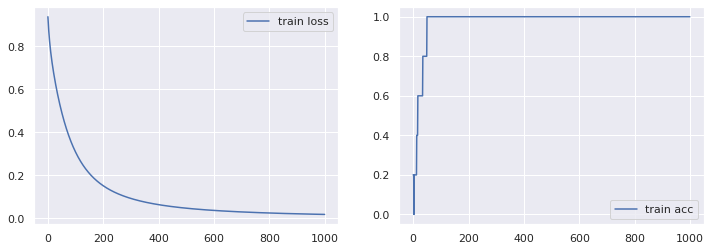

{'Weight1': array([[ 0.97950847, -0.21920261,  1.13048286,  1.44091661],
        [-1.79992368, -0.69116296,  0.01344251,  0.55162724],
        [-0.61388416,  0.50605782, -0.60782747, -0.49779048],
        [ 0.02006814, -1.59943441, -1.94681196, -0.26993023],
        [-1.7335863 ,  0.49231816, -1.62877926, -1.11260842],
        [ 2.39732735, -0.21109681,  0.99920678, -1.10589981],
        [-0.3280137 ,  0.1942336 , -0.93462456,  0.35726828],
        [-0.11744076, -0.12113865, -0.11850868,  1.98221762],
        [-0.74204465, -1.24646166,  0.09399748, -1.13937155],
        [-0.09701359, -1.7919377 , -1.63406323,  0.37655268],
        [ 1.35726666,  0.26148882,  0.5031518 , -0.23788781],
        [-1.46717548, -0.6809262 , -0.44929226,  1.02241832]]),
 'noise1': array([[-0.42722271],
        [ 0.4510819 ],
        [-0.00121158],
        [ 0.90267663],
        [ 0.95374704],
        [-0.53553666],
        [-0.14342787],
        [-0.05188929],
        [ 0.33449613],
        [ 0.72342909],
   

In [ ]:
neural_network(X, Y, nlayer1=12)

# Problème III : Classification


On suppose que R-Studion et/ou Python sont installés. Nous commençons
par importer les librairies utiles.
Dans cet exercice, il s’agit d’implémenter un réseau de neurones de haute performance pour classifier des personnes, selon plusieurs caractéristiques, en risque
élevé (« 1 ») ou risque faible (« 0 ») d’avoir une cardiopathie. Ainsi, à partir du
répertoire en ligne "Échantillons de données" de l’ENT, considérez l’échantillon
de données intitulé « HD_Complete_Data ». Respecter les consignes suivantes :
1. Diviser votre base de données en 80% pour l’apprentissage et 20% pour le
test.
2. Expliquer comment vous avez réglé le problème des données catégorielles.
3. Vous êtes libre de choisir les paramètres de votre modèle afin d’optimiser la
performance (Vous serez évalué sur les résultats de votre modèle appliqué
aux données test).
4. Expliquer comment vous avez fait pour réduire le surapprentissage
5. Analyser et interpréter, en détail, la performance de votre modèle :
(a) Erreurs de classification.
(b) Matrice de confusion détaillée.
(c) Courbe ROC et AUC.
(d) Etc.
6. Donner une conclusion générale sur votre modèle comportant vos recommandations et remarques.

## Chargement, Visualisation rapide et séparation des données

In [ ]:
df=pd.read_csv('/content/HD_Complete_Data.csv',sep=';')

In [ ]:
df.head()

,Age,Sexe,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
print(df.head(),df.tail()) #displaying the first information of the dataframe
print(df.describe()) #visualizing the basic information about the dataset
print('Here is the shape of our Data frame ' '' + str(df.shape)+ '') #printing the shape of the Data Frame
print(df.info(),df.shape) #printing information about the different columns of the dataset

   Age Sexe ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    M           ATA        140          289          0     Normal   
1   49    F           NAP        160          180          0     Normal   
2   37    M           ATA        130          283          0         ST   
3   48    F           ASY        138          214          0     Normal   
4   54    M           NAP        150          195          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0        Age Sexe ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45    M            TA        110          264          0     Normal   
914   68    M           ASY        144         

In [ ]:
df.isnull().values.any()

False

Lors de la visualisation basique, on se rend compte de plusieurs choses:

1) Notre dataset est composé de variable quantitative et qualitative pour les features (les prédicteurs en français) et que notre target variable (variable cible) est elle de type binaire (Disease or healthy, assimilable à 0 ou 1). Toutefois certaines variables catégorielles sont pour le moment encodé selon un type de variable "string" ainsi afin de permettre à l'ordinateur de bien les interpréter, nous allons les encoder suivant le one hot encoding comme dans la suite du code. Nous verifirons ensuite que le changement a bien été effectué en revisualisant les infos du dataframe.

2) On voit également que l'on a 918 lignes dans notre Dataset, ce nombre de données est assez grand pour pouvoir faire un dataset de validation assez grand pour pouvoir les utiliser pour interpréter les résultats ainsi nous séparerons par la suite notre jeu de données avec un rapport de 80/20 entre le jeu de données d'entrainement (training set) et du jeu de données de test (testing set)

3) On a également la possibilité de voir que l'on a 11 colonnes de prédicteurs ce qui nous permet d'avoir différentes variables auxquelles on va s'intéresser.


Commençons par visualiser nos données et leurs répartitions

In [ ]:
L=df.columns.to_list() #takings all the different columns name
def dataviz(column):
  if df[column].dtype==object:
    sns.set(style="darkgrid")
    is_dup = df[column].value_counts()
    plt.figure(figsize=(8,4))
    gfg=sns.barplot(is_dup.index, is_dup.values, alpha=0.8)
    gfg.set(xlabel ="Categorie value", ylabel = "number of occurences", title ='number of occurences for the ' +str(column)+ ' variable')
    plt.show()
    plt.savefig('histogram and boxplot of : ' +str(column), dpi=300)
    plt.show()
  
  else :
    sns.set(style="darkgrid")
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    # assigning a graph to each ax
    sns.boxplot(df[column], ax=ax_box)
    sns.histplot(data=df[column], ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.savefig('histogram and boxplot of : ' +str(column), dpi=300)
    plt.show()

## Visualsation des corrélations

Maintenant que l'on voit un peu mieux comment se comporte chaque variable, nous allons nous intéresser aux intéractions entre les différentes variables, nottament via l'analyse des différentes corrélations entres ces dernières. on va donc regarder la correlation des différentes variables suivant notre variable cible (Target variable)

In [ ]:
df.corr() #computing the correlation matrix of the different variables

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [ ]:
corre=df.corr().iloc[-1].sort_values(ascending=False)[1:] #selecting the class row and display the values by descending order
print(corre) #printing it

Oldpeak        0.403951
Age            0.282039
FastingBS      0.267291
RestingBP      0.107589
Cholesterol   -0.232741
MaxHR         -0.400421
Name: HeartDisease, dtype: float64


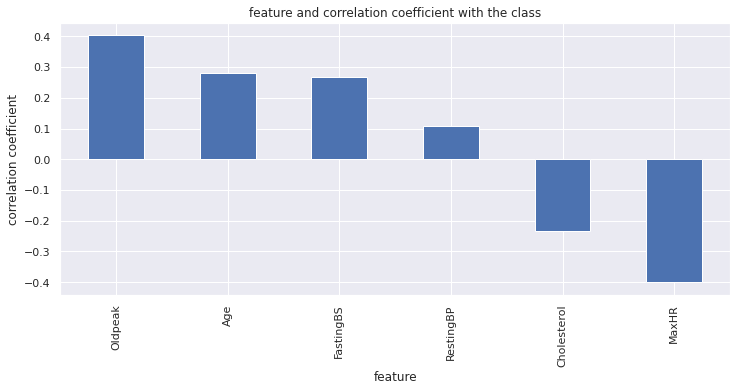

In [ ]:
plt.figure(figsize=(12, 5)) #setting the figure size
labels = [f"{i}" for i in corre.index.to_list()] #extracting the different label
ax = corre.plot(kind="bar") #ploting the different bars
ax.set_title("feature and correlation coefficient with the class") #setting the tittle
ax.set_xlabel("feature") #setting de x labels
ax.set_ylabel("correlation coefficient") #setting the y label
ax.set_xticklabels(labels) # setting the x ticks labels
plt.savefig('Feature and correlation coefficient for class',dpi=300) #saving the figure
plt.show() #showing the graph

On observe donc une correlation très importante entre la variable prédite et oldpeak, cette correlation est bien plus significative que la correlation avec les autres variables. De même on observe que la variable Max HR à une correlation inverse significative.

## Préparation de l'entrainement

Maintenant que nous savons un peu plus quelles sont nos données et comment elles se comportent, nous pouvons préparer la creation d'un classifier qui s'appuierait sur ces dernières, on va donc commencer par séparer notre jeu de données en essayant de conserver les caractéristiques propres de notre dataset (nottament la répartition de 0 et 1 suivant notre variable cible. notre training set et testing set seront donc balancé). afin de valider au mieux notre modèle dans le futur, on va également creer un training set et un testing set avec un rapport 80/0 afin d'éviter tout risque de biais supplémentaires suite à l'apprentissage. 

In [ ]:
df.head()

,Age,Sexe,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Initialisation de l'encodeur
On va utiliser différentes fonction du module `sklearn` et de `seaborn`.

In [ ]:
OneHotEncoder(
    categories='auto',  # Categories per feature
    drop=None, # Whether to drop one of the features
    sparse=True, # Will return sparse matrix if set True
    handle_unknown='error' # Whether to raise an error 
)         

OneHotEncoder()

### Implémentation
On décompose la méthode étape par étape :

In [ ]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['Sexe', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
print(transformed_df.head())

   onehotencoder__x0_F  onehotencoder__x0_M  onehotencoder__x1_ASY  \
0                  0.0                  1.0                    0.0   
1                  1.0                  0.0                    0.0   
2                  0.0                  1.0                    0.0   
3                  1.0                  0.0                    1.0   
4                  0.0                  1.0                    0.0   

   onehotencoder__x1_ATA  onehotencoder__x1_NAP  onehotencoder__x1_TA  \
0                    1.0                    0.0                   0.0   
1                    0.0                    1.0                   0.0   
2                    1.0                    0.0                   0.0   
3                    0.0                    0.0                   0.0   
4                    0.0                    1.0                   0.0   

   onehotencoder__x2_LVH  onehotencoder__x2_Normal  onehotencoder__x2_ST  \
0                    0.0                       1.0              

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
transformed_df.head()

,onehotencoder__x0_F,onehotencoder__x0_M,onehotencoder__x1_ASY,onehotencoder__x1_ATA,onehotencoder__x1_NAP,onehotencoder__x1_TA,onehotencoder__x2_LVH,onehotencoder__x2_Normal,onehotencoder__x2_ST,onehotencoder__x3_N,...,onehotencoder__x4_Down,onehotencoder__x4_Flat,onehotencoder__x4_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0,0.0


### Séparation des données

On fini la préparation de nos données par une séparation du dataset en training set et testing set

In [ ]:
dfexp=transformed_df.copy() #creating a copy of the dataframe
yexp=dfexp['HeartDisease'] #selecting the target variables
xexp=dfexp.drop(['HeartDisease'],axis=1) #selecting the features only
# Split dataset into training set and test set

X_train,X_test,y_train,y_test= train_test_split(xexp,yexp,test_size=0.2, random_state=42, shuffle=True, stratify=df['HeartDisease']) #splitting into different values in order to go quicker in the computation selecting only 20% of the data

print(y_test)

print("Here is the proportion of positive on the target variable in the testing set " +str(y_test.value_counts()[1]/(y_test.value_counts()[1]+y_test.value_counts()[0])) +'')
print("Here is the proportion of positive on the target variable in the training set " +str(y_train.value_counts()[1]/(y_train.value_counts()[1]+y_train.value_counts()[0])) +'')


print(X_train,y_train) #printing training data 
print(X_test,y_test) #printing testing data


356    1.0
763    1.0
817    1.0
735    1.0
892    0.0
      ... 
52     0.0
752    1.0
492    1.0
622    1.0
316    1.0
Name: HeartDisease, Length: 184, dtype: float64
Here is the proportion of positive on the target variable in the testing set 0.5543478260869565
Here is the proportion of positive on the target variable in the training set 0.553133514986376
     onehotencoder__x0_F  onehotencoder__x0_M  onehotencoder__x1_ASY  \
485                  0.0                  1.0                    0.0   
486                  0.0                  1.0                    0.0   
117                  1.0                  0.0                    1.0   
361                  0.0                  1.0                    1.0   
296                  0.0                  1.0                    1.0   
..                   ...                  ...                    ...   
276                  0.0                  1.0                    0.0   
201                  0.0                  1.0                  

Standardisation des données : 

afin d'éviter tout biais supplémentaires dans nos données, nous allons procéder à une standardisation de notre dataset

In [ ]:
sc = StandardScaler() #initializing the scaler
X_train = sc.fit_transform(X_train) #transforming X_train
X_test = sc.transform(X_test) #transforming X_test

## Creation du réseaux de neurones



### Creation des Scripts et calcul des métriques


Nous avons créer un script permettant d'entrainer un modèle et calculer différentes métriques ainsi que un grid search pour pouvoir comparer ces derniers 

In [ ]:
tf.random.set_seed(42) #creating a seed in order to generate similar results in the future

def modeltosearch(nlayer1,nlayer2,bsize,epochsval,act1,act2,act3): #creating a function that create keras model easily
  ann = tf.keras.models.Sequential() #Initializing the ANN, creating the model under tensorflow
  ann.add(tf.keras.layers.Dense(units=nlayer1, activation=act1, input_shape=X_train[0].shape)) # Add the input layer and first hidden layer
  ann.add(tf.keras.layers.Dense(units=nlayer2, activation=act2))  # Add the second hidden layer
  ann.add(tf.keras.layers.Dense(units=1, activation=act3)) # Add the output layer
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) #compiling optimization options and parameters of the model
  ann.fit(X_train, y_train, batch_size = bsize, epochs = epochsval) #fitting the model


  y_pred = ann.predict(X_test) #making the prediction
  y_pred = (y_pred > 0.5) #getting the prediction values for the classification
  # predict probabilities for test set
  y_probs = ann.predict(X_test, verbose=0)# predict crisp classes for test set
  y_classes = y_pred
  # reduce to 1d array
  y_probs = y_probs[:, 0]
  y_pred = y_pred[:, 0]
  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, y_classes)
  # precision tp / (tp + fp)
  precision = precision_score(y_test, y_classes)
  # recall: tp / (tp + fn)
  recall = recall_score(y_test, y_classes)
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, y_classes)
  auc = roc_auc_score(y_test, y_probs)

  pd.DataFrame(list(zip(y_test, y_pred)), columns=['Actual', 'Predicted']) #creating a dataframe containing all the predictions
  acc=accuracy_score(y_test, y_pred) #computing accuracy
  param=[nlayer1,nlayer2,bsize,epochsval,act1,act2,act3] #getting the parameters of the model and storing it in a variable

  dictcompare={'Accuracy' : accuracy,'Recall':recall,'Precision':precision,'F1-score':f1,'AUC':auc }

  return param, acc,ann,dictcompare

def personnalgridsearch(varnlayer1,varnlayer2,varbsize,varepochsval,varact1,varact2,varact3):
  param=[] #intializing list containing infos about models
  accuracies=[] #intializing list containing accuracies to compare
  #looping all the parameter

  for k in range(0,len(varnlayer1)):
    for p in range(0,len(varnlayer2)):
      for m in range(0,len(varbsize)):
        for g in range(0,len(varepochsval)):
          for o in range(0,len(varact1)):
            for i in range(0,len(varact2)):
              for t in range(0,len(varact3)):
                val=modeltosearch(varnlayer1[k],varnlayer2[p],varbsize[m],varepochsval[g],varact1[o],varact2[i],varact3[t])
                param.append(val[0]) #storing infos
                accuracies.append(val[1]) #storing accuracies
  gridsearch={'param': param, 'accuracy': accuracies}
  dfsearch=pd.DataFrame(data=gridsearch)
  return dfsearch



Nous avons entrepris la création d'un gridsearch toutefois le temps de calcul très long de la fonction ne nous a pas permis de l'exploiter

In [ ]:
#grided=personnalgridsearch([5,12],[18,3],[30,2],[90,100],['relu','sigmoid'],['relu','sigmoid'],['sigmoid','relu'])

### Entraînement du modèle et choix des paramètres

Afin d'entrainer notre modèle, nous avons choisi ces différents paramètres :    

taille du layer 1 : 20 

taille du layer 2 : 12

Batch size : 30 

epochs : 70

Relu comme fonction d'activation pour les deux premiers layers et sigmoid pour le dernier

In [ ]:
ann=modeltosearch(20,12,30,70,'relu','relu','sigmoid') #creating our model and training it + computing metrics

Epoch 1/70
25/25 [==============================] - 2s 5ms/step - loss: 0.9296 - accuracy: 0.4564
Epoch 2/70
25/25 [==============================] - 0s 5ms/step - loss: 0.6458 - accuracy: 0.6689
Epoch 3/70
25/25 [==============================] - 0s 4ms/step - loss: 0.5254 - accuracy: 0.7766
Epoch 4/70
25/25 [==============================] - 0s 4ms/step - loss: 0.4608 - accuracy: 0.8106
Epoch 5/70
25/25 [==============================] - 0s 5ms/step - loss: 0.4165 - accuracy: 0.8297
Epoch 6/70
25/25 [==============================] - 0s 9ms/step - loss: 0.3877 - accuracy: 0.8420
Epoch 7/70
25/25 [==============================] - 0s 5ms/step - loss: 0.3690 - accuracy: 0.8460
Epoch 8/70
25/25 [==============================] - 0s 5ms/step - loss: 0.3556 - accuracy: 0.8569
Epoch 9/70
25/25 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8569
Epoch 10/70
25/25 [==============================] - 0s 4ms/step - loss: 0.3385 - accuracy: 0.8583
Epoch 11/70
25/25 [

In [ ]:
print(ann[3]) #priting its metrics

{'Accuracy': 0.875, 'Recall': 0.9215686274509803, 'Precision': 0.8623853211009175, 'F1-score': 0.8909952606635071, 'AUC': 0.9281444285031086}


Visualisation de la structure de notre modèle

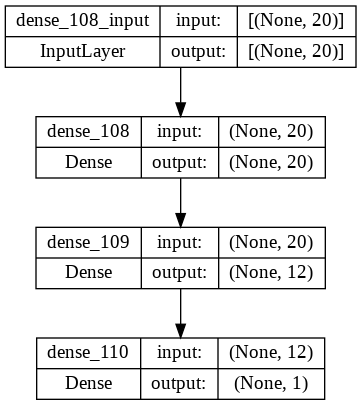

In [ ]:
plot_model(ann[2], #plotting the model and saving it into a png
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

In [ ]:
ann_viz(ann[2], view=True, filename='ourneuralnetwork', title='MyNeural Network') #creating a visualisation of the model and saving it

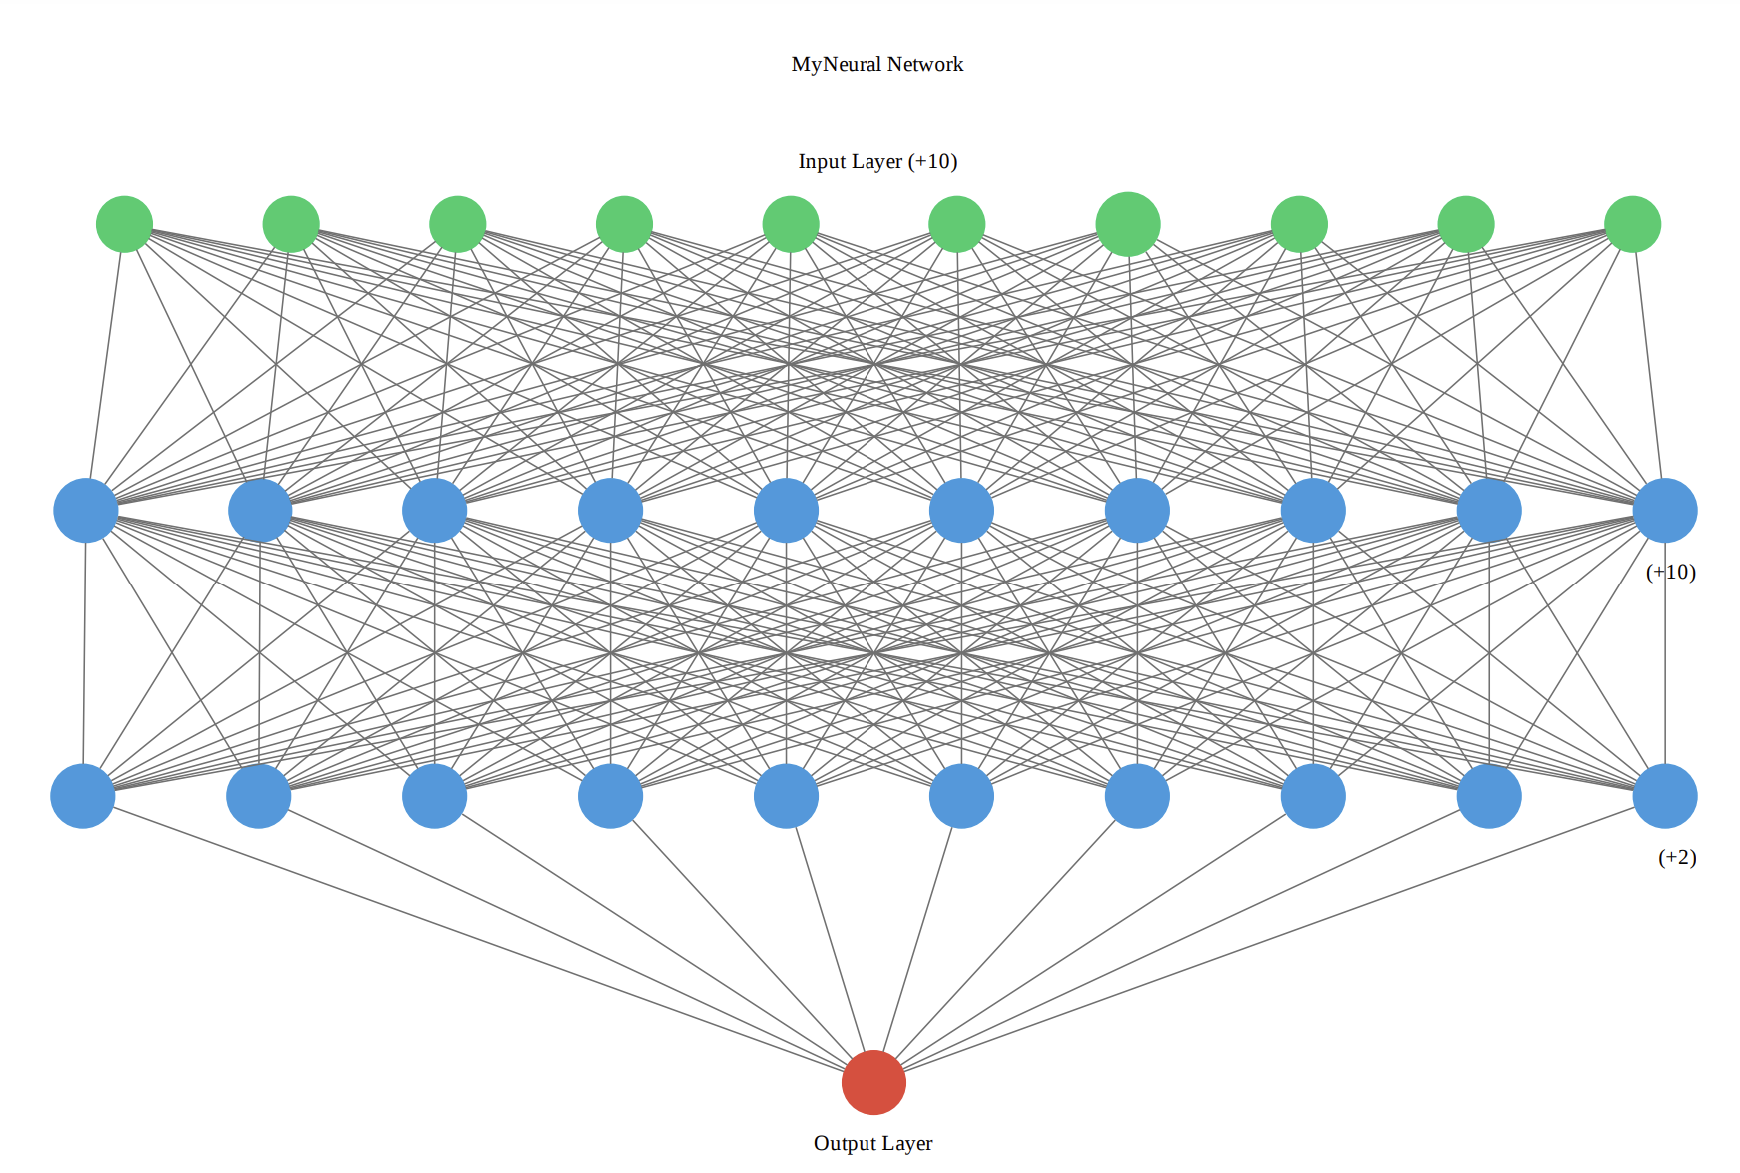

Calcul des prédictions afin de connaitre différentes métriques sur notre modèle

In [ ]:
ann[2].compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) #compiling the model for predictions
ann[2].fit(X_train, y_train, batch_size = 32, epochs = 100) #fitting the model

Epoch 1/100
23/23 [==============================] - 2s 8ms/step - loss: 0.2227 - accuracy: 0.9060
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2187 - accuracy: 0.9128
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2176 - accuracy: 0.9128
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2162 - accuracy: 0.9114
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2142 - accuracy: 0.9087
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2138 - accuracy: 0.9087
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2132 - accuracy: 0.9142
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2106 - accuracy: 0.9128
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2101 - accuracy: 0.9142
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2083 - accuracy: 0.9114
Epoch 11/

In [ ]:
y_pred = ann[2].predict(X_test) #making the predictions
y_pred = (y_pred > 0.5) #returning the classes
pd.DataFrame(list(zip(y_test, y_pred)), columns=['Actual', 'Predicted']) #visualizing results

6/6 [==============================] - 0s 4ms/step


,Actual,Predicted
0,1.0,[True]
1,1.0,[False]
2,1.0,[True]
3,1.0,[True]
4,0.0,[False]
...,...,...
179,0.0,[False]
180,1.0,[True]
181,1.0,[True]
182,1.0,[True]


In [ ]:
print(confusion_matrix(y_test, y_pred)) #printing confusion matrix and accuracy
print(accuracy_score(y_test, y_pred))

[[67 15]
 [13 89]]
0.8478260869565217


# Problème IV : Time series analysis


## Modèle de type LSTM

## Chargement, Visualisation rapide et séparation des données

In [ ]:
df4=pd.read_csv('/content/Danube ammonium level complete data Time Series.csv',sep=';', decimal=",") #reading the table

In [ ]:
df4.head() #displaying the head

,Months,Ammonium,TSS,Alkalinity,Conductivity,DO,pH,WT
0,01/01/1996,0.253333,7.016667,3.836667,455.916667,12.383333,8.056667,2.075000
1,01/02/1996,0.218889,6.666667,3.968889,458.000000,12.877778,8.068889,1.911111
2,01/03/1996,0.242000,21.420000,3.798000,462.900000,12.990000,8.083000,3.930000
3,01/04/1996,0.134545,13.400000,3.337273,399.727273,11.404545,8.180000,8.863636
4,01/05/1996,0.113333,25.666667,3.032222,350.444444,11.055556,8.393333,14.455556


In [ ]:
print(df4.head(),df4.tail()) #displaying the first information of the dataframe
print(df4.describe()) #visualizing the basic information about the dataset
print('Here is the shape of our Data frame ' '' + str(df4.shape)+ '') #printing the shape of the Data Frame
print(df4.info(),df4.shape) #printing information about the different columns of the dataset

       Months  Ammonium        TSS  Alkalinity  Conductivity         DO  \
0  01/01/1996  0.253333   7.016667    3.836667    455.916667  12.383333   
1  01/02/1996  0.218889   6.666667    3.968889    458.000000  12.877778   
2  01/03/1996  0.242000  21.420000    3.798000    462.900000  12.990000   
3  01/04/1996  0.134545  13.400000    3.337273    399.727273  11.404545   
4  01/05/1996  0.113333  25.666667    3.032222    350.444444  11.055556   

         pH         WT  
0  8.056667   2.075000  
1  8.068889   1.911111  
2  8.083000   3.930000  
3  8.180000   8.863636  
4  8.393333  14.455556            Months  Ammonium         TSS  Alkalinity  Conductivity         DO  \
259  01/08/2017  0.031222   57.833333    2.959231    343.000000   8.992308   
260  01/09/2017  0.045875  113.100000    3.235455    360.000000  10.054545   
261  01/10/2017  0.032474   17.100000    3.156364    386.285714  10.381818   
262  01/11/2017  0.047125   20.785714    3.135455    395.285714  11.690909   
263  01/1

In [ ]:
df4.isnull().values.any()

False

Lors de la visualisation basique, on se rend compte de plusieurs choses:

1) Notre dataset est composé de variable temporelle pour les features (les prédicteurs en français), ici dans un premier cadre on pose qu'il n'y en a qu'une et que notre target variable (variable cible) est elle de type quantitative (taux d'ammonium). On observe cependant que le type de nos variables n'est pas adapté, en effet nos types sont des object pour le moment et ne sont donc pas interprétable par un réseau de neurones, nous allons donc devoir les encoder suivant un type de variable intélligible pour le réseau de neuronnes.

2) On voit également que l'on a 264 lignes dans notre Dataset, ce nombre de données est assez grand pour pouvoir faire un dataset de validation nous prendrons donc 12 prédictions pour tester notre modèle et 252 pour entrainer nos modèles.

3) On a commencera dans un premier cadre par utiliser ce jeu de données avec uniquement 2 colonnes puis nous essaierons un modèle avec plus de données.


Commençons par formater nos données et visualiser leurs répartitions

### convertissons la colonne mois en datetime format

In [ ]:
df4.index = pd.to_datetime(df4['Months'], format='%d/%m/%Y')
df4[:26]
df4['Months']=pd.to_datetime(df4['Months'], format='%d/%m/%Y')

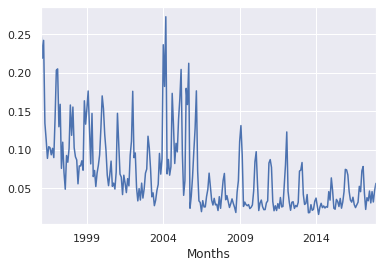

In [ ]:
temp = df4['Ammonium'] #only taking the ammonium column
temp.plot() #plotting the series

In [ ]:
sc1 = MinMaxScaler(feature_range=(0, 1)) #initializing the scaler
df4['Months'] = pd.to_datetime(df4['Months']).view('int64')
temp = sc1.fit_transform(temp.to_numpy().reshape(-1,1))

In [ ]:
def df_tonp(df4, window_size=5): #function to make windows of ammonium at multiple T
  df_as_np = df4
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 3
X1, y1 = df_tonp(temp, WINDOW_SIZE) #making the list containing the data and previous information (window_size gives it)
X1.shape, y1.shape

((261, 3, 1, 1), (261, 1))

In [ ]:
X_train1, y_train1 = X1[:247], y1[:247] #extracting the different training values
X_test1, y_test1 = X1[247:], y1[247:] #exctracting the different test values

In [ ]:
X_train1 #visulaizing what contain X_train, only the 3 previous values of ammonium

array([[[[0.92474813]],

        [[0.7903514 ]],

        [[0.880528  ]]],


       [[[0.7903514 ]],

        [[0.880528  ]],

        [[0.46125032]]],


       [[[0.880528  ]],

        [[0.46125032]],

        [[0.37848341]]],


       [[[0.46125032]],

        [[0.37848341]],

        [[0.2835387 ]]],


       [[[0.37848341]],

        [[0.2835387 ]],

        [[0.34271868]]],


       [[[0.2835387 ]],

        [[0.34271868]],

        [[0.33816517]]],


       [[[0.34271868]],

        [[0.33816517]],

        [[0.30162787]]],


       [[[0.33816517]],

        [[0.30162787]],

        [[0.33426328]]],


       [[[0.30162787]],

        [[0.33426328]],

        [[0.28744059]]],


       [[[0.33426328]],

        [[0.28744059]],

        [[0.48687014]]],


       [[[0.28744059]],

        [[0.48687014]],

        [[0.72965359]]],


       [[[0.48687014]],

        [[0.72965359]],

        [[0.73615804]]],


       [[[0.72965359]],

        [[0.73615804]],

        [[0.44351623]]],



In [ ]:
y_train1

array([[0.46125032],
       [0.37848341],
       [0.2835387 ],
       [0.34271868],
       [0.33816517],
       [0.30162787],
       [0.33426328],
       [0.28744059],
       [0.48687014],
       [0.72965359],
       [0.73615804],
       [0.44351623],
       [0.55702613],
       [0.23281412],
       [0.36547841],
       [0.21265305],
       [0.12746307],
       [0.29808105],
       [0.26402925],
       [0.33426328],
       [0.55347932],
       [0.40016232],
       [0.54323295],
       [0.33709996],
       [0.29134248],
       [0.27573492],
       [0.1547763 ],
       [0.24542113],
       [0.24487487],
       [0.27118141],
       [0.22359005],
       [0.57476023],
       [0.45652123],
       [0.53574132],
       [0.6244235 ],
       [0.4337615 ],
       [0.25551532],
       [0.51091359],
       [0.19139555],
       [0.22240778],
       [0.14111969],
       [0.20940278],
       [0.24842169],
       [0.30162787],
       [0.43701178],
       [0.59959186],
       [0.53574132],
       [0.404

In [ ]:
model = Sequential() #initalizing the model
model.add(InputLayer((WINDOW_SIZE, 1))) #creating the input layer
model.add(LSTM(20)) #creating the lstm layer
model.add(Dense(5, 'relu')) #creating another layer
model.add(Dense(1, 'tanh')) #creating the output layer
model.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_63 (LSTM)              (None, 20)                1760      
                                                                 
 dense_111 (Dense)           (None, 5)                 105       
                                                                 
 dense_112 (Dense)           (None, 1)                 6         
                                                                 
Total params: 1,871
Trainable params: 1,871
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0105), metrics='mean_squared_error')

In [ ]:
model.fit(X_train1, y_train1,batch_size=40, epochs=200, callbacks=[cp1])

Epoch 1/200
1/7 [===>..........................] - ETA: 19s - loss: 0.0921 - mean_squared_error: 0.0921

7/7 [==============================] - 3s 8ms/step - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 2/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465

7/7 [==============================] - 0s 9ms/step - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 3/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299

7/7 [==============================] - 0s 6ms/step - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 4/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256

7/7 [==============================] - 0s 6ms/step - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 5/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315

7/7 [==============================] - 0s 5ms/step - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 6/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236

7/7 [==============================] - 0s 6ms/step - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 7/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290

7/7 [==============================] - 0s 6ms/step - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 8/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231

7/7 [==============================] - 0s 6ms/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 9/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282

7/7 [==============================] - 0s 7ms/step - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 10/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213

7/7 [==============================] - 0s 5ms/step - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 11/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229

7/7 [==============================] - 0s 6ms/step - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 12/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120

7/7 [==============================] - 0s 6ms/step - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 13/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144

7/7 [==============================] - 0s 6ms/step - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 14/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242

7/7 [==============================] - 0s 7ms/step - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 15/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192

7/7 [==============================] - 0s 6ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 16/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205

7/7 [==============================] - 0s 5ms/step - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 17/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317

7/7 [==============================] - 0s 6ms/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 18/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232

7/7 [==============================] - 0s 5ms/step - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 19/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109

7/7 [==============================] - 0s 5ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 20/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177

7/7 [==============================] - 0s 6ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 21/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099

7/7 [==============================] - 0s 8ms/step - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 22/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226

7/7 [==============================] - 0s 8ms/step - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 23/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116

7/7 [==============================] - 0s 6ms/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 24/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103

7/7 [==============================] - 0s 6ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 25/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196

7/7 [==============================] - 0s 8ms/step - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 26/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246

7/7 [==============================] - 0s 7ms/step - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 27/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246

7/7 [==============================] - 0s 5ms/step - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 28/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328

7/7 [==============================] - 0s 6ms/step - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 29/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155

7/7 [==============================] - 0s 6ms/step - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 30/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161

7/7 [==============================] - 0s 5ms/step - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 31/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161

7/7 [==============================] - 0s 7ms/step - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 32/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081

7/7 [==============================] - 0s 6ms/step - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 33/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127

7/7 [==============================] - 0s 6ms/step - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 34/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151

7/7 [==============================] - 0s 6ms/step - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 35/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178

7/7 [==============================] - 0s 7ms/step - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 36/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090

7/7 [==============================] - 0s 6ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 37/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182

7/7 [==============================] - 0s 5ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 38/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069

7/7 [==============================] - 0s 5ms/step - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 39/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066

7/7 [==============================] - 0s 6ms/step - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 40/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102

7/7 [==============================] - 0s 8ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 41/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136

7/7 [==============================] - 0s 6ms/step - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 42/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088

7/7 [==============================] - 0s 6ms/step - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 43/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144

7/7 [==============================] - 0s 7ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 44/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168

7/7 [==============================] - 0s 7ms/step - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 45/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210

7/7 [==============================] - 0s 6ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 46/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106

7/7 [==============================] - 0s 6ms/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 47/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212

7/7 [==============================] - 0s 6ms/step - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 48/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163

7/7 [==============================] - 0s 7ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 49/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101

7/7 [==============================] - 0s 6ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 50/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201

7/7 [==============================] - 0s 7ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 51/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245

7/7 [==============================] - 0s 6ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 52/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167

7/7 [==============================] - 0s 7ms/step - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 53/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088

7/7 [==============================] - 0s 5ms/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 54/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122

7/7 [==============================] - 0s 7ms/step - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 55/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192

7/7 [==============================] - 0s 7ms/step - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 56/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098

7/7 [==============================] - 0s 6ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 57/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097

7/7 [==============================] - 0s 8ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 58/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133

7/7 [==============================] - 0s 6ms/step - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 59/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162

7/7 [==============================] - 0s 6ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 60/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096

7/7 [==============================] - 0s 6ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 61/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113

7/7 [==============================] - 0s 7ms/step - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 62/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113

7/7 [==============================] - 0s 7ms/step - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 63/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103

7/7 [==============================] - 0s 6ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 64/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189

7/7 [==============================] - 0s 6ms/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 65/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104

7/7 [==============================] - 0s 7ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 66/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213

7/7 [==============================] - 0s 8ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 67/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142

7/7 [==============================] - 0s 7ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 68/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083

7/7 [==============================] - 0s 7ms/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 69/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155

7/7 [==============================] - 0s 6ms/step - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 70/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107

7/7 [==============================] - 0s 8ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 71/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156

7/7 [==============================] - 0s 7ms/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 72/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160

7/7 [==============================] - 0s 7ms/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 73/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095

7/7 [==============================] - 0s 8ms/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 74/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238

7/7 [==============================] - 0s 8ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 75/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 7ms/step - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 76/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083

7/7 [==============================] - 0s 6ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 77/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121

7/7 [==============================] - 0s 7ms/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 78/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144

7/7 [==============================] - 0s 7ms/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 79/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127

7/7 [==============================] - 0s 5ms/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 80/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107

7/7 [==============================] - 0s 6ms/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 81/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 6ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 82/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169

7/7 [==============================] - 0s 6ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 83/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104

7/7 [==============================] - 0s 7ms/step - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 84/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102

7/7 [==============================] - 0s 6ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 85/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197

7/7 [==============================] - 0s 6ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 86/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129

7/7 [==============================] - 0s 6ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 87/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070

7/7 [==============================] - 0s 6ms/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 88/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094

7/7 [==============================] - 0s 8ms/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 89/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119

7/7 [==============================] - 0s 6ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 90/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190

7/7 [==============================] - 0s 7ms/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 91/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097

7/7 [==============================] - 0s 7ms/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 92/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087

7/7 [==============================] - 0s 6ms/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 93/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090

7/7 [==============================] - 0s 7ms/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 94/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245

7/7 [==============================] - 0s 7ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 95/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089

7/7 [==============================] - 0s 6ms/step - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 96/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145

7/7 [==============================] - 0s 6ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 97/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115

7/7 [==============================] - 0s 6ms/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 98/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154

7/7 [==============================] - 0s 5ms/step - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 99/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108

7/7 [==============================] - 0s 6ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 100/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081

7/7 [==============================] - 0s 6ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 101/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0055 - mean_squared_error: 0.0055

7/7 [==============================] - 0s 6ms/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 102/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142

7/7 [==============================] - 0s 5ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 103/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178

7/7 [==============================] - 0s 6ms/step - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 104/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118

7/7 [==============================] - 0s 6ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 105/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106

7/7 [==============================] - 0s 7ms/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 106/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140

7/7 [==============================] - 0s 5ms/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 107/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100

7/7 [==============================] - 0s 6ms/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 108/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115

7/7 [==============================] - 0s 5ms/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 109/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128

7/7 [==============================] - 0s 5ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 110/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124

7/7 [==============================] - 0s 7ms/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 111/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163

7/7 [==============================] - 0s 8ms/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 112/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154

7/7 [==============================] - 0s 7ms/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 113/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122

7/7 [==============================] - 0s 6ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 114/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103

7/7 [==============================] - 0s 7ms/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 115/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135

7/7 [==============================] - 0s 6ms/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 116/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079

7/7 [==============================] - 0s 6ms/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 117/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105

7/7 [==============================] - 0s 6ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 118/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124

7/7 [==============================] - 0s 7ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 119/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195

7/7 [==============================] - 0s 6ms/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 120/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162

7/7 [==============================] - 0s 6ms/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 121/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194

7/7 [==============================] - 0s 6ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 122/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156

7/7 [==============================] - 0s 5ms/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 123/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197

7/7 [==============================] - 0s 6ms/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 124/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127

7/7 [==============================] - 0s 6ms/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 125/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186

7/7 [==============================] - 0s 6ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 126/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130

7/7 [==============================] - 0s 6ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 127/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246

7/7 [==============================] - 0s 7ms/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 128/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121

7/7 [==============================] - 0s 7ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 129/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091

7/7 [==============================] - 0s 6ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 130/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144

7/7 [==============================] - 0s 6ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 131/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241

7/7 [==============================] - 0s 7ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 132/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091

7/7 [==============================] - 0s 6ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 133/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182

7/7 [==============================] - 0s 7ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 134/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095

7/7 [==============================] - 0s 6ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 135/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095

7/7 [==============================] - 0s 6ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 136/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157

7/7 [==============================] - 0s 6ms/step - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 137/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058

7/7 [==============================] - 0s 6ms/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 138/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153

7/7 [==============================] - 0s 5ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 139/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205

7/7 [==============================] - 0s 6ms/step - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 140/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124

7/7 [==============================] - 0s 6ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 141/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168

7/7 [==============================] - 0s 6ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 142/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185

7/7 [==============================] - 0s 6ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 143/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129

7/7 [==============================] - 0s 6ms/step - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 144/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197

7/7 [==============================] - 0s 5ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 145/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142

7/7 [==============================] - 0s 6ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 146/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0147 - mean_squared_error: 0.0147

7/7 [==============================] - 0s 7ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 147/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105

7/7 [==============================] - 0s 7ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 148/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080

7/7 [==============================] - 0s 6ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 149/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0051 - mean_squared_error: 0.0051

7/7 [==============================] - 0s 7ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 150/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225

7/7 [==============================] - 0s 8ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 151/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081

7/7 [==============================] - 0s 6ms/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 152/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130

7/7 [==============================] - 0s 6ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 153/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096

7/7 [==============================] - 0s 7ms/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 154/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134

7/7 [==============================] - 0s 7ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 155/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108

7/7 [==============================] - 0s 6ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 156/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094

7/7 [==============================] - 0s 7ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 157/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094

7/7 [==============================] - 0s 7ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 158/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128

7/7 [==============================] - 0s 6ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 159/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140

7/7 [==============================] - 0s 8ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 160/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075

7/7 [==============================] - 0s 8ms/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 161/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140

7/7 [==============================] - 0s 6ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 162/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097

7/7 [==============================] - 0s 7ms/step - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 163/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116

7/7 [==============================] - 0s 6ms/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 164/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102

7/7 [==============================] - 0s 7ms/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 165/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145

7/7 [==============================] - 0s 8ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 166/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137

7/7 [==============================] - 0s 6ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 167/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129

7/7 [==============================] - 0s 8ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 168/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113

7/7 [==============================] - 0s 6ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 169/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187

7/7 [==============================] - 0s 7ms/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 170/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085

7/7 [==============================] - 0s 6ms/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 171/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067

7/7 [==============================] - 0s 6ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 172/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065

7/7 [==============================] - 0s 7ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 173/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110

7/7 [==============================] - 0s 7ms/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 174/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097

7/7 [==============================] - 0s 6ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 175/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084

7/7 [==============================] - 0s 7ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 176/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154

7/7 [==============================] - 0s 7ms/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 177/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085

7/7 [==============================] - 0s 6ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 178/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125

7/7 [==============================] - 0s 6ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 179/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102

7/7 [==============================] - 0s 7ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 180/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156

7/7 [==============================] - 0s 8ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 181/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129

7/7 [==============================] - 0s 7ms/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 182/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146

7/7 [==============================] - 0s 8ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 183/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090

7/7 [==============================] - 0s 7ms/step - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 184/200
7/7 [==============================] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118

7/7 [==============================] - 0s 11ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 185/200
7/7 [==============================] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121

7/7 [==============================] - 0s 10ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 186/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085

7/7 [==============================] - 0s 7ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 187/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070

7/7 [==============================] - 0s 6ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 188/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117

7/7 [==============================] - 0s 7ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 189/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155

7/7 [==============================] - 0s 7ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 190/200
7/7 [==============================] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124

7/7 [==============================] - 0s 11ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 191/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085

7/7 [==============================] - 0s 6ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 192/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152

7/7 [==============================] - 0s 9ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 193/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135

7/7 [==============================] - 0s 8ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 194/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141

7/7 [==============================] - 0s 9ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 195/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057

7/7 [==============================] - 0s 8ms/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 196/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219

7/7 [==============================] - 0s 8ms/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 197/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073

7/7 [==============================] - 0s 8ms/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 198/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105

7/7 [==============================] - 0s 8ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 199/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137

7/7 [==============================] - 0s 7ms/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 200/200
1/7 [===>..........................] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132

7/7 [==============================] - 0s 7ms/step - loss: 0.0118 - mean_squared_error: 0.0118


In [ ]:
train_predictions = model.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1.flatten()})
train_results

8/8 [==============================] - 1s 4ms/step


,Train Predictions,Actuals
0,0.367800,0.461250
1,0.414592,0.378483
2,0.297171,0.283539
3,0.242726,0.342719
4,0.349717,0.338165
...,...,...
242,0.059276,0.086981
243,0.085738,0.049671
244,0.058566,0.034434
245,0.054648,0.048223


# Plotting results

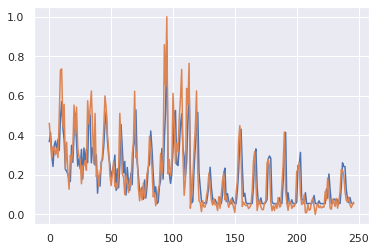

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])



1/1 [==============================] - 0s 48ms/step


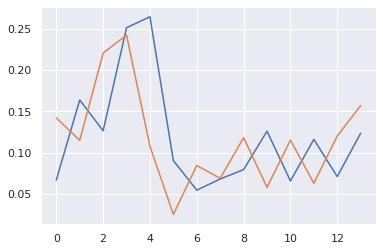

In [ ]:
test_predictions = model.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Val Predictions':test_predictions, 'Actuals':y_test1.flatten()})
test_results
plt.plot(test_results['Val Predictions'])
plt.plot(test_results['Actuals'])

In [ ]:
sc1.inverse_transform(y_test1.flatten().reshape(-1,1))

array([[0.05275 ],
       [0.045789],
       [0.072833],
       [0.078438],
       [0.043938],
       [0.022813],
       [0.038   ],
       [0.034   ],
       [0.046615],
       [0.031222],
       [0.045875],
       [0.032474],
       [0.047125],
       [0.056563]])

In [ ]:
sc1.inverse_transform(test_predictions.flatten().reshape(-1,1))

array([[0.03346897],
       [0.05832757],
       [0.04875746],
       [0.08071605],
       [0.084129  ],
       [0.03952007],
       [0.03033854],
       [0.03379767],
       [0.03671468],
       [0.04863681],
       [0.03319428],
       [0.0460896 ],
       [0.03456359],
       [0.04801371]], dtype=float32)

In [ ]:
df4['Ammonium'].tail()

Months
2017-08-01    0.031222
2017-09-01    0.045875
2017-10-01    0.032474
2017-11-01    0.047125
2017-12-01    0.056563
Name: Ammonium, dtype: float64

In [ ]:
test_results['RMSE']=(test_results['Val Predictions']-test_results['Actuals'])**2
RMSE=np.sum(test_results['RMSE'])
RMSE=np.sqrt(RMSE/12)
print(RMSE)


0.07164100242121875


# Ce travail à été réalisé par Julien Séailles, je vous remercie pour le temps que vous avez pris pour le parcourir et nous espère sincèrement que ce travail vous aura plu !

[Si jamais vous souhaitez avoir accès au google collab, il est disponible juste ici : https://colab.research.google.com/drive/1rLWCvYU692BqE45Q1R2_Fk4BvET6JOy8?usp=sharing](https://colab.research.google.com/drive/1922hgx-ka-SEzfKmKNHW7UuKj7VV9hr2?usp=sharing)